In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

file_path = 'Cost of Resistance Database_cleaned.xlsx'
df = pd.read_excel(file_path)

df.replace('inf',np.inf, inplace=True)

In [62]:
ic50_res = df['IC50 of Resistant Population']
ic50_sens = df['IC50 of Sensitive Population']

dt_res = df['Doubling Time of Resistant Population (in h)']
dt_sens = df['Doubling Time of Sensitive Population (in h)']

ic50_ratio = ic50_res/ic50_sens
dt_ratio = dt_res/dt_sens


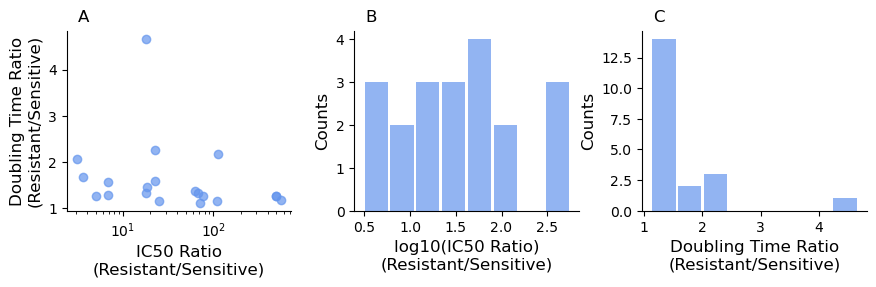

In [63]:
fig,ax_list = plt.subplots(ncols=3,figsize=(9,3))

ax = ax_list[0]
ax.scatter(ic50_ratio,dt_ratio,color='cornflowerblue',alpha=0.7)
ax.set_xscale('log')

ax.set_xlabel('IC50 Ratio\n(Resistant/Sensitive)',fontsize=12)
ax.set_ylabel('Doubling Time Ratio\n(Resistant/Sensitive)',fontsize=12)

# filter infinit ic50

dt_ratio = dt_ratio[ic50_ratio != np.inf]
ic50_ratio = ic50_ratio[ic50_ratio != np.inf]

ax.annotate('A',xy=(0.05,1.05),xycoords='axes fraction',fontsize=12)

ax = ax_list[1]

ax.hist(np.log10(ic50_ratio),bins=8,rwidth=0.9,color='cornflowerblue',alpha=0.7)

ax.set_xlabel('log10(IC50 Ratio)\n(Resistant/Sensitive)',fontsize=12)
ax.set_ylabel('Counts',fontsize=12)

ax.annotate('B',xy=(0.05,1.05),xycoords='axes fraction',fontsize=12)

ax = ax_list[2]

ax.hist(dt_ratio,bins=8,rwidth=0.9,color='cornflowerblue',alpha=0.7)

ax.set_xlabel('Doubling Time Ratio\n(Resistant/Sensitive)',fontsize=12)
ax.set_ylabel('Counts',fontsize=12)

ax.annotate('C',xy=(0.05,1.05),xycoords='axes fraction',fontsize=12)

for ax in ax_list:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.tight_layout()

fig.savefig('summary_fig.pdf',bbox_inches='tight')


In [65]:
dt_ratio

0     2.173469
1     1.118644
2     1.250000
3     1.318182
4     1.323529
5     1.171429
6     1.264706
7     1.157143
8     1.263158
9     1.263158
10    1.554846
14    1.447284
16    1.592593
17    2.250000
18    4.666667
19    2.058824
20    1.677419
21    1.368134
22    1.153676
23    1.290141
dtype: float64